In [7]:
%matplotlib inline

In [8]:
import sys
sys.path.insert(0,'..')
import pickle

import visualize
import datasets
import ldle
# Uncomment to reload a library
from importlib import reload 
visualize = reload(visualize)
ldle = reload(ldle)
datasets = reload(datasets)

matplotlib.get_backend() =  module://ipykernel.pylab.backend_inline


In [9]:
save_dir_root = '../data/ldle/swissrollwithhole/'

In [10]:
X, labelsMat, ddX = datasets.Datasets().swissrollwithhole()

X.shape =  (9946, 3)


# LDLE

In [11]:
ldle_obj = ldle.LDLE(X=X, eta_min=5, max_iter0=30,
                     vis = visualize.Visualize(save_dir_root),
                     vis_y_options = {'cmap0':'summer', # for the interior
                                      'cmap1':'jet', # for the tear
                                      'labels':labelsMat[:,0]})

A_k, Atilde_k: 0 points processed...
A_k, Atilde_k: 2486 points processed...
A_k, Atilde_k: 4972 points processed...
A_k, Atilde_k: 7458 points processed...
A_k, Atilde_k: 9944 points processed...
Atilde_k, Atilde_k: all points processed...

Constructing low distortion local views using LDLE...
local_param: 0 points processed...
local_param: 2486 points processed...
local_param: 4972 points processed...
local_param: 7458 points processed...
local_param: 9944 points processed...
local_param: all 9946 points processed...
After iter 1, max distortion is 10.371660
After iter 2, max distortion is 8.275650
After iter 3, max distortion is 8.275650
After iter 4, max distortion is 8.275650
After iter 5, max distortion is 8.275650
After iter 6, max distortion is 8.275650
After iter 7, max distortion is 8.275650
Max local distortion = 8.275649983879816
###############
Took 51.2 seconds to perform step 1: construct low distoriton local views
###############

Clustering to obtain low distortion int

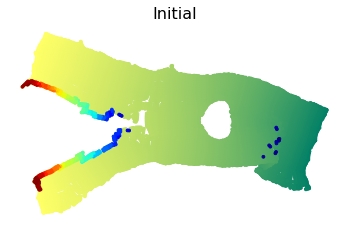

###############
Took 15.0 seconds to compute initial global embedding.
###############

Refining parameters and computing final global embedding...
Using GPA...
Iteration: 0
error: 0.0008110882345224352


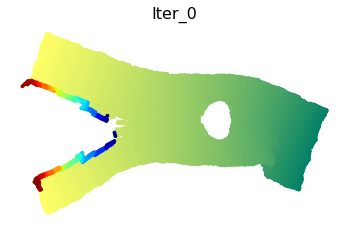

Iteration: 1
error: 0.0007600615013535916
Iteration: 2
error: 0.0007561209993457227
Iteration: 3
error: 0.0007561085697667336
Iteration: 4
error: 0.0007561393209192175
Iteration: 5
error: 0.0007690153338763959


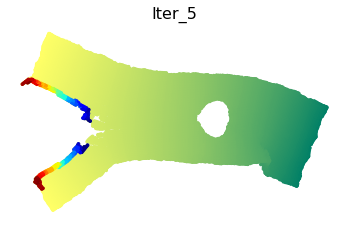

Iteration: 6
error: 0.000782680279003979
Iteration: 7
error: 0.0007966300090005621
Iteration: 8
error: 0.0007892729217894417
Iteration: 9
error: 0.000775884239798918
Iteration: 10
error: 0.0007749091065494788


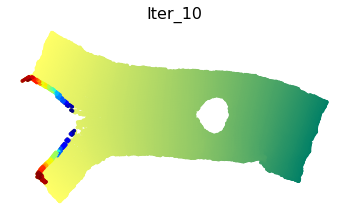

Iteration: 11
error: 0.0007028921024650202
Iteration: 12
error: 0.0006745127877090434
Iteration: 13
error: 0.0006599715904663854
Iteration: 14
error: 0.0006594465954336101
Iteration: 15
error: 0.0006524626716700539


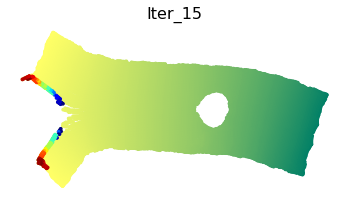

Iteration: 16
error: 0.0006529208959538585
Iteration: 17
error: 0.0006493827560720165
Iteration: 18
error: 0.0006415686036281824
Iteration: 19
error: 0.0006344492033914233
Iteration: 20
error: 0.0006244258047731837


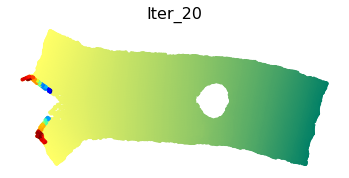

Iteration: 21
error: 0.000613100761717573
Iteration: 22
error: 0.0005940996285148187
Iteration: 23
error: 0.0005752541302517414
Iteration: 24
error: 0.0005521891852672905
Iteration: 25
error: 0.000531015252909837


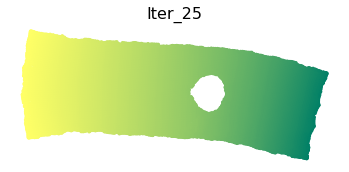

Iteration: 26
error: 0.0005122179922270721
Iteration: 27
error: 0.0005037286431166147
Iteration: 28
error: 0.0004994015751402527
Iteration: 29
error: 0.0004968759384419832


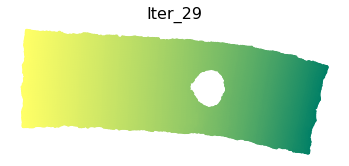

###############
Took 912.7 seconds to refine global embedding.
###############
###############
Took 932.7 seconds to perform step 3: compute global embedding.
###############


In [12]:
ldle_obj.fit()

# Optionally save for further visualizations using Visualization.ipynb

In [13]:
save_path = save_dir_root+'/ldle_obj.dat'
with open(save_path, "wb") as f:
    pickle.dump([X, labelsMat, ldle_obj], f)

# LTSA

In [14]:
from sklearn.manifold import LocallyLinearEmbedding
import visualize
vis = visualize.Visualize(save_dir_root)

In [15]:
ltsa_obj = LocallyLinearEmbedding(method='ltsa', n_neighbors=5, n_components=2, n_jobs=-1, random_state=42)

In [16]:
y_ltsa = ltsa_obj.fit_transform(X)

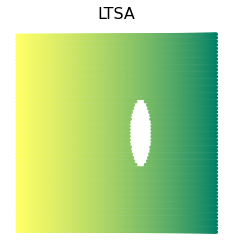

In [17]:
vis.global_embedding(y_ltsa, labelsMat[:,0], 'summer', title='LTSA')

# UMAP

In [18]:
from umap import UMAP
import visualize
vis = visualize.Visualize(save_dir_root)

In [19]:
umap_obj = UMAP(n_neighbors=200, min_dist=0.25, n_components=2,
                random_state=42, n_epochs=500, metric='euclidean')

In [20]:
y_umap = umap_obj.fit_transform(X)

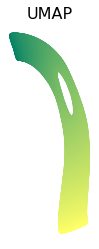

In [21]:
vis.global_embedding(y_umap, labelsMat[:,0], 'summer', title='UMAP')

# t-SNE

In [22]:
from sklearn.manifold import TSNE
import visualize
vis = visualize.Visualize(save_dir_root)

In [23]:
tsne_obj = TSNE(perplexity=50, early_exaggeration=4, n_components=2,
                metric='euclidean', random_state=42, n_iter=1000,
                n_jobs=-1, init='random')

In [24]:
y_tsne = tsne_obj.fit_transform(X)

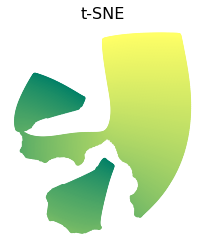

In [25]:
vis.global_embedding(y_tsne, labelsMat[:,0], 'summer', title='t-SNE')